#Install Dependencies



In [ ]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 886f1c03d839575afecb059accf74296fad395b6

Cloning into 'yolov5'...
remote: Enumerating objects: 13551, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 13551 (delta 51), reused 46 (delta 28), pack-reused 13476
Receiving objects: 100% (13551/13551), 12.13 MiB | 6.54 MiB/s, done.
Resolving deltas: 100% (9451/9451), done.
/content/yolov5
HEAD is now at 886f1c0 DDP after autoanchor reorder (#2421)


In [ ]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     |████████████████████████████████| 596 kB 32.2 MB/s 
Setup complete. Using torch 1.11.0+cu113 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


# Download Correctly Formatted Custom Dataset 


In [ ]:
%mkdir train
%cd train
%mkdir images
%mkdir labels
%cd ../
%mkdir test
%cd test
%mkdir images
%mkdir labels



/content/yolov5/train
/content/yolov5
/content/yolov5/test


In [ ]:
classes = []
nc = 0

In [ ]:
def download_MoCA():
  # Download Datasets
  %cd /content
  # Download Test.zip
  !gdown --id 1-HYC2trnB2StJg3bJXK1eGZ_8PdoHbr5
  # Download Train zip
  !gdown --id 1-Fb4Nzn9bvs_Q3RAZnSRyON_ukjWt-xF


In [ ]:
def download_COD10K():
  %cd /content
  # Download Dataset_COD10KOnly.zip
  !gdown --id 1_5Ln01-NnnyLIye7IFGyqHLgcei6vzud


In [ ]:
def download_COD10K_MoCA():
  # Download Datasets
  %cd /content
  # Download Test.zip
  !gdown --id 1-HYC2trnB2StJg3bJXK1eGZ_8PdoHbr5
  # Download Train zip
  !gdown --id 1-Fb4Nzn9bvs_Q3RAZnSRyON_ukjWt-xF
  # Dataset_COD10KOnly.zip
  !gdown --id 1_5Ln01-NnnyLIye7IFGyqHLgcei6vzud


In [ ]:
def unzip_MoCA():
  # Unzip Train File
  !unzip /content/train.zip 
  # Unzip Test File
  !unzip /content/test.zip

In [ ]:
def unzip_COD10K():
  # Unzip COD10K Dataset
  !unzip /content/Dataset_COD10KOnly.zip


In [ ]:
def unzip_COD10K_MoCA():
  # Unzip Train File
  !unzip /content/train.zip
  # Unzip Test File
  !unzip /content/test.zip
  # Unzip COD10K Dataset
  !unzip /content/Dataset_COD10KOnly.zip

In [ ]:
def copy_MoCA():
  !mv /content/content/train/Images/*.jpg /content/yolov5/train/images/
  !mv /content/content/test/Images/*.jpg /content/yolov5/test/images/
  !mv /content/content/train/Labels/*.txt /content/yolov5/train/labels/
  !mv /content/content/test/Labels/*.txt /content/yolov5/test/labels/

In [ ]:
def copy_COD10K():
  !mv /content/Dataset/Train/Images/*.jpg /content/yolov5/train/images/
  !mv /content/Dataset/Test/Images/*.jpg /content/yolov5/test/images/
  !mv /content/Dataset/Train/Labels/*.txt /content/yolov5/train/labels/
  !mv /content/Dataset/Test/Labels/*.txt /content/yolov5/test/labels/

In [ ]:
def copy_COD10K_MoCA():
  !mv /content/content/train/Images/*.jpg /content/yolov5/train/images/
  !mv /content/content/test/Images/*.jpg /content/yolov5/test/images/
  !mv /content/content/train/Labels/*.txt /content/yolov5/train/labels/
  !mv /content/content/test/Labels/*.txt /content/yolov5/test/labels/
  !mv /content/Dataset/Train/Images/*.jpg /content/yolov5/train/images/
  !mv /content/Dataset/Test/Images/*.jpg /content/yolov5/test/images/
  !mv /content/Dataset/Train/Labels/*.txt /content/yolov5/train/labels/
  !mv /content/Dataset/Test/Labels/*.txt /content/yolov5/test/labels/

In [ ]:
def MoCA_Data ():
  global classes,nc
  classes = [
    "Flower crab spider",
    "Polar bear",
    "Grasshopper",
    "Flounder",
    "Snowy owl",
    "Goat",
    "Black cat",
    "Bear",
    "Spider tailed horned viper",
    "Rodent x",
    "Potoo",
    "Arctic fox",
    "Devil scorpionfish",
    "Arabian horn viper",
    "Snow leopard",
    "Peacock flounder",
    "Stick insect",
    "Seal",
    "Snowshoe hare",
    "Leaf katydid",
    "Scorpionfish",
    "Jerboa",
    "Cuttlefish",
    "Orchid mantis",
    "Lion cub",
    "Rabbit",
    "Rusty spotted cat",
    "Eastern screech owl",
    "Flatfish",
    "Hedgehog",
    "Groundhog",
    "Starfish",
    "Pygmy seahorse",
    "Plaice",
    "Arctic wolf",
    "Copperhead snake",
    "Ibex",
    "Polar bear cub",
    "White tailed ptarmigan",
    "Lioness",
    "Dead leaf butterfly",
    "Fossa",
    "Smallfish",
    "Turtle",
    "Chameleon",
    "Marine iguana",
    "Crab",
    "Nile monitor",
    "Moth",
    "Horned owl",
    "Mongoose",
    "Hermit crab",
    "Elephant",
    "Sand cat",
    "Wolf",
    "Octopus",
    "Desert fox",
    "Mountain goat",
    "Leaf tail gecko",
    "Meerkat",
    "Sole",
    "Lichen katydid",
    "Pallas cat",
    "Shrimp",
    "Markhor",
    "Egyptian nightjar",
    "Hyena",
  ]
  nc = len(classes)


In [ ]:
def COD10K_Data():
  global classes,nc
  classes = ['Ant',
 'Bat',
 'BatFish',
 'Bee',
 'Beetle',
 'Bird',
 'Bittern',
 'Bug',
 'Butterfly',
 'Cat',
 'Caterpillar',
 'Centipede',
 'Chameleon',
 'Cheetah',
 'Cicada',
 'ClownFish',
 'Crab',
 'Crocodile',
 'CrocodileFish',
 'Deer',
 'Dog',
 'Dragonfly',
 'Duck',
 'Fish',
 'Flounder',
 'Frog',
 'FrogFish',
 'Frogmouth',
 'Gecko',
 'GhostPipefish',
 'Giraffe',
 'Grasshopper',
 'Grouse',
 'Heron',
 'Human',
 'Kangaroo',
 'Katydid',
 'LeafySeaDragon',
 'Leopard',
 'Lion',
 'Lizard',
 'Mantis',
 'Mockingbird',
 'Monkey',
 'Moth',
 'Octopus',
 'Other',
 'Owl',
 'Owlfly',
 'Pagurian',
 'Pipefish',
 'Rabbit',
 'Reccoon',
 'Sciuridae',
 'ScorpionFish',
 'SeaHorse',
 'Sheep',
 'Shrimp',
 'Slug',
 'Snake',
 'Spider',
 'StarFish',
 'StickInsect',
 'Stingaree',
 'Tiger',
 'Toad',
 'Turtle',
 'Wolf',
 'Worm']
  nc = len(classes)

In [ ]:
def COD10K_MoCA_Data():
  global classes,nc
  classes = ['Flower crab spider',
  'Polar bear',
  'Grasshopper',
  'Flounder',
  'Snowy owl',
  'Goat',
  'Black cat',
  'Bear',
  'Spider tailed horned viper',
  'Rodent x',
  'Potoo',
  'Arctic fox',
  'Devil scorpionfish',
  'Arabian horn viper',
  'Snow leopard',
  'Peacock flounder',
  'Stick insect',
  'Seal',
  'Snowshoe hare',
  'Leaf katydid',
  'Scorpionfish',
  'Jerboa',
  'Cuttlefish',
  'Orchid mantis',
  'Lion cub',
  'Rabbit',
  'Rusty spotted cat',
  'Eastern screech owl',
  'Flatfish',
  'Hedgehog',
  'Groundhog',
  'Starfish',
  'Pygmy seahorse',
  'Plaice',
  'Arctic wolf',
  'Copperhead snake',
  'Ibex',
  'Polar bear cub',
  'White tailed ptarmigan',
  'Lioness',
  'Dead leaf butterfly',
  'Fossa',
  'Smallfish',
  'Turtle',
  'Chameleon',
  'Marine iguana',
  'Crab',
  'Nile monitor',
  'Moth',
  'Horned owl',
  'Mongoose',
  'Hermit crab',
  'Elephant',
  'Sand cat',
  'Wolf',
  'Octopus',
  'Desert fox',
  'Mountain goat',
  'Leaf tail gecko',
  'Meerkat',
  'Sole',
  'Lichen katydid',
  'Pallas cat',
  'Shrimp',
  'Markhor',
  'Egyptian nightjar',
  'Hyena',
  'Ant',
  'Bat',
  'BatFish',
  'Bee',
  'Beetle',
  'Bird',
  'Bittern',
  'Bug',
  'Butterfly',
  'Cat',
  'Caterpillar',
  'Centipede',
  'Cheetah',
  'Cicada',
  'ClownFish',
  'Crocodile',
  'CrocodileFish',
  'Deer',
  'Dog',
  'Dragonfly',
  'Duck',
  'Fish',
  'Frog',
  'FrogFish',
  'Frogmouth',
  'Gecko',
  'GhostPipefish',
  'Giraffe',
  'Grouse',
  'Heron',
  'Human',
  'Kangaroo',
  'Katydid',
  'LeafySeaDragon',
  'Leopard',
  'Lion',
  'Lizard',
  'Mantis',
  'Mockingbird',
  'Monkey',
  'Other',
  'Owl',
  'Owlfly',
  'Pagurian',
  'Pipefish',
  'Reccoon',
  'Sciuridae',
  'ScorpionFish',
  'SeaHorse',
  'Sheep',
  'Slug',
  'Snake',
  'Spider',
  'StarFish',
  'StickInsect',
  'Stingaree',
  'Tiger',
  'Toad',
  'Worm'
  ]
  nc =len(classes)

# Define Model Configuration and Architecture



In [ ]:
def MoCA():
  print("Download MoCA")
  download_MoCA()
  print("Unip MoCA")
  unzip_MoCA()
  print("Copy MoCA")
  copy_MoCA()
  print("MoCA Dataset")
  MoCA_Data()

def COD10K():
  print("Download COD10K")
  download_COD10K()
  print("Unip COD10K")
  unzip_COD10K()
  print("Copy COD10K")
  copy_COD10K()

  COD10K_Data()

def COD10K_MoCA():
  print("Download MoCA")
  download_COD10K_MoCA()
  print("Unip MoCA")
  unzip_COD10K_MoCA()
  print("Copy MoCA")
  copy_COD10K_MoCA()
  print("MoCA Dataset")
  COD10K_MoCA_Data()


In [ ]:
#MoCA()
#COD10K()
COD10K_MoCA()

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Train/Images/7876.jpg  
  inflating: Dataset/Train/Images/10180.jpg  
  inflating: Dataset/Train/Images/7954.jpg  
  inflating: Dataset/Train/Images/10603.jpg  
  inflating: Dataset/Train/Images/10521.jpg  
  inflating: Dataset/Train/Images/10531.jpg  
  inflating: Dataset/Train/Images/11481.jpg  
  inflating: Dataset/Train/Images/9671.jpg  
  inflating: Dataset/Train/Images/9434.jpg  
  inflating: Dataset/Train/Images/8875.jpg  
  inflating: Dataset/Train/Images/8206.jpg  
  inflating: Dataset/Train/Images/9181.jpg  
  inflating: Dataset/Train/Images/7928.jpg  
  inflating: Dataset/Train/Images/9078.jpg  
  inflating: Dataset/Train/Images/10034.jpg  
  inflating: Dataset/Train/Images/11209.jpg  
  inflating: Dataset/Train/Images/9739.jpg  
  inflating: Dataset/Train/Images/9569.jpg  
  inflating: Dataset/Train/Images/10370.jpg  
  inflating: Dataset/Train/Images/8317.jpg  
  inflating: Dataset/Train/Images/7739.jp

In [ ]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic
@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/yolov5/data.yaml
train: ./train/images
val: ./test/images

nc: {nc}
names: {classes}

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {nc}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

# Train Custom YOLOv5 Detector

In [ ]:
# train yolov5s on custom data for 100 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 100 --data /content/yolov5/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache

/content/yolov5
github: ⚠️ WARNING: code is out of date by 1062 commits. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
YOLOv5 v4.0-126-g886f1c0 torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='./models/custom_yolov5s.yaml', data='/content/yolov5/data.yaml', device='', entity=None, epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], linear_lr=False, local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='yolov5s_results', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov5s_results', single_cls=False, sync_bn=False, total_batch_size=16, weights='', workers=8, world_size=1)
wandb: Install Weights & Biases for YOLOv5 logging with 'pip install wandb' (recommended)
Start Tensorboard with "ten

# Evaluate Custom YOLOv5 Detector Performance

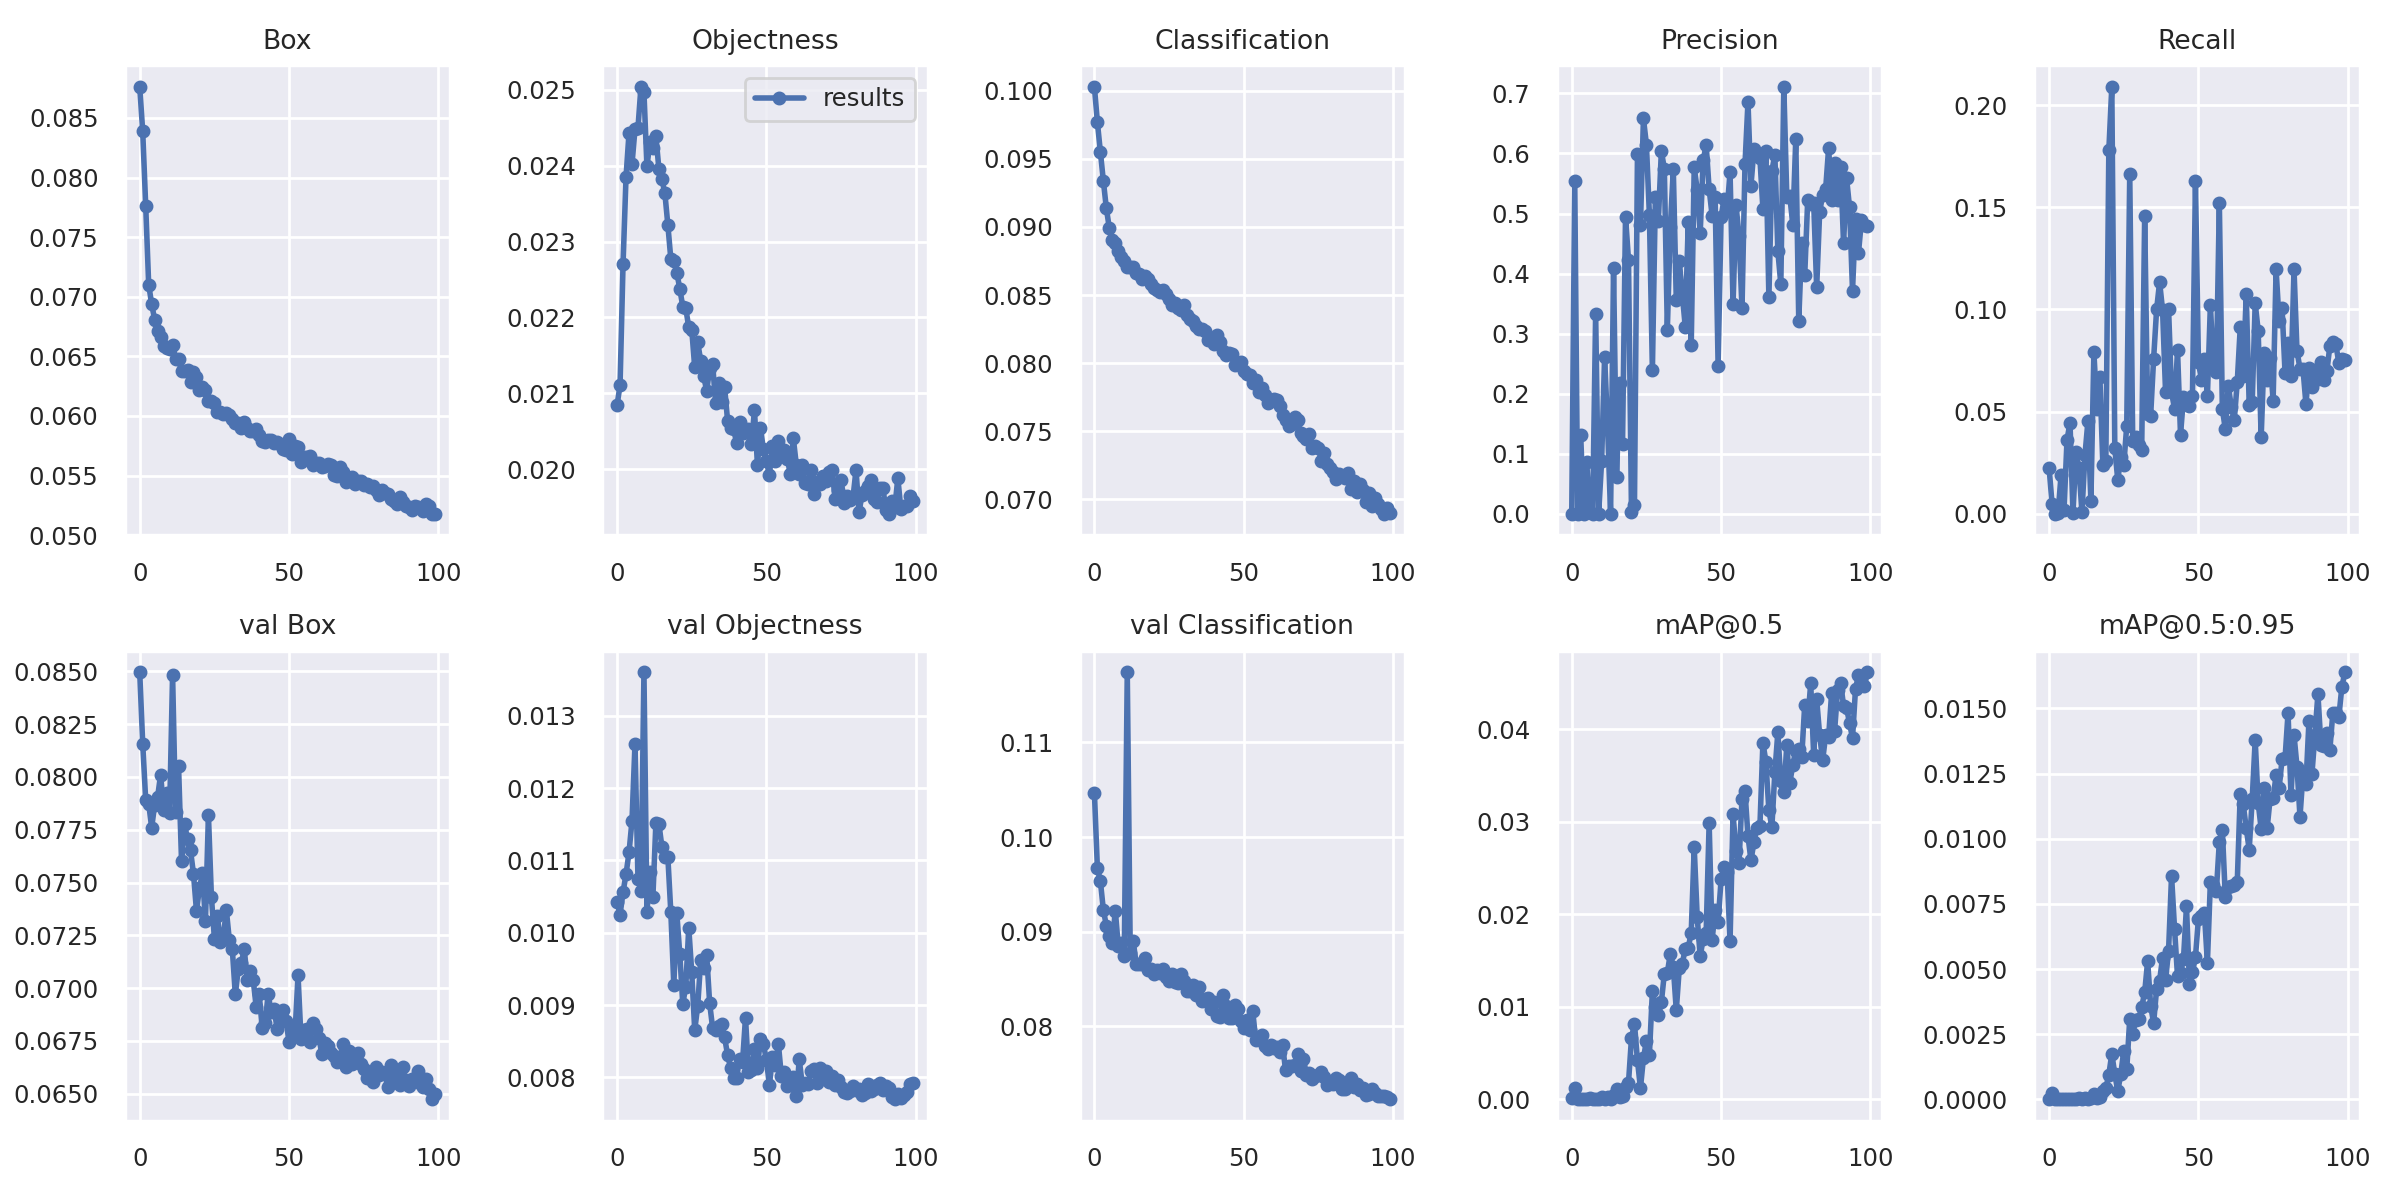

In [ ]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename="/content/yolov5/runs/train/yolov5s_results/results.png", width=1000)  # view results.png

## Visualize Our Training Data with Labels



GROUND TRUTH TRAINING DATA:


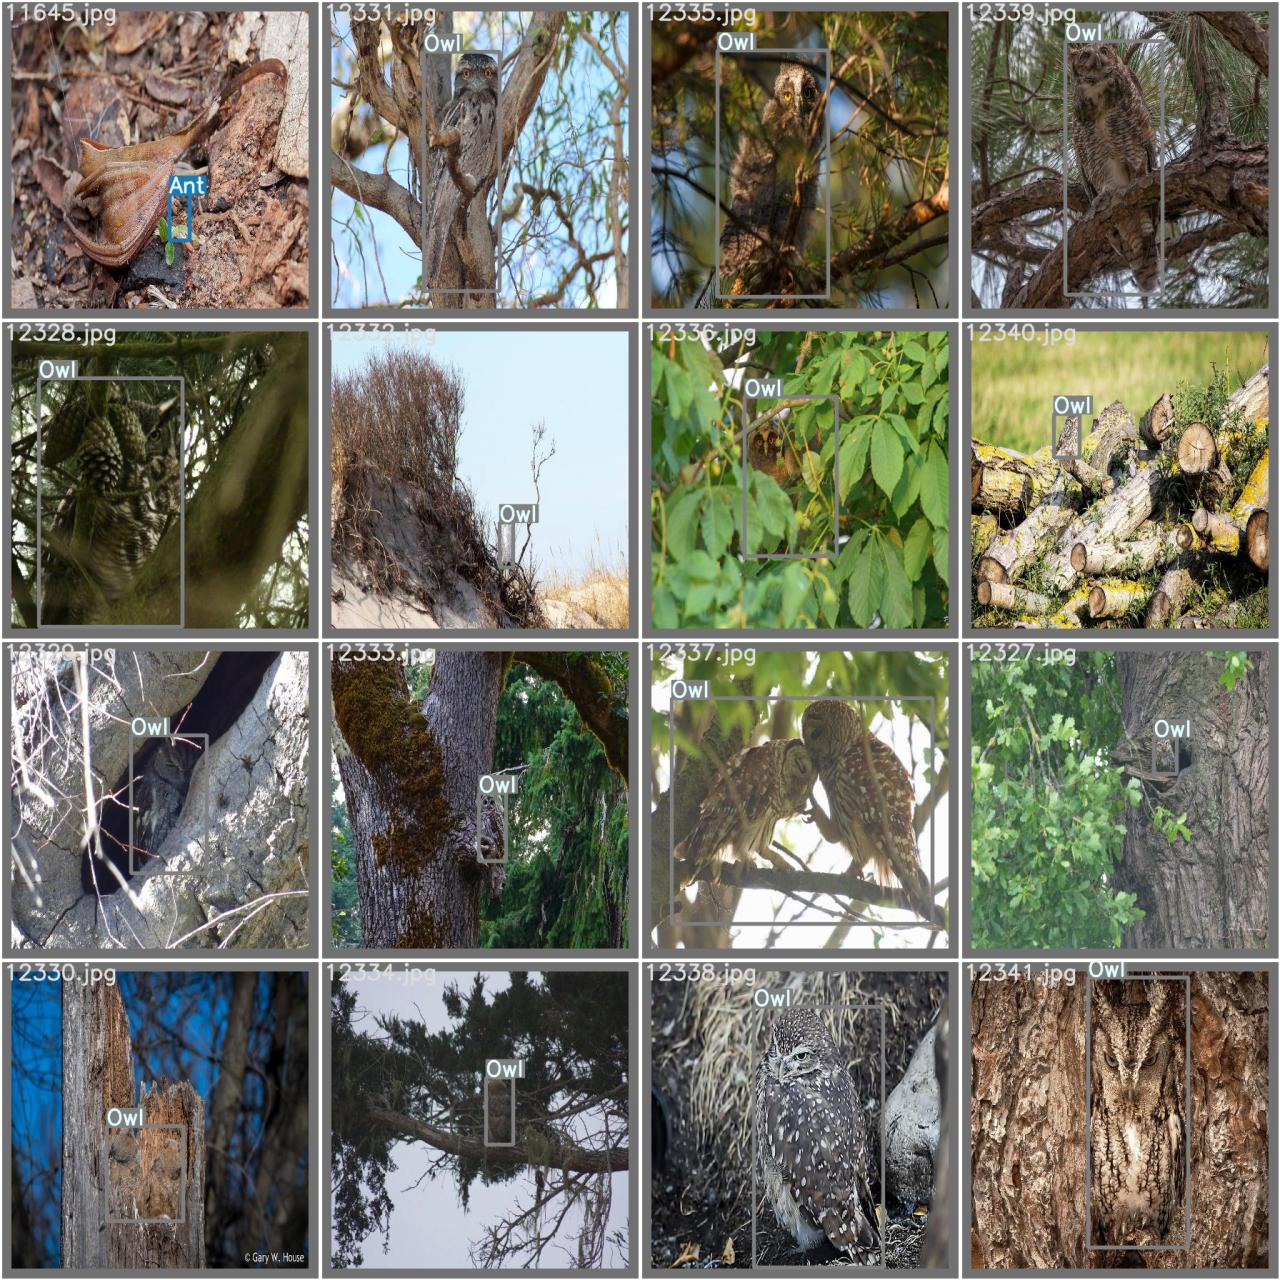

In [ ]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results/test_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


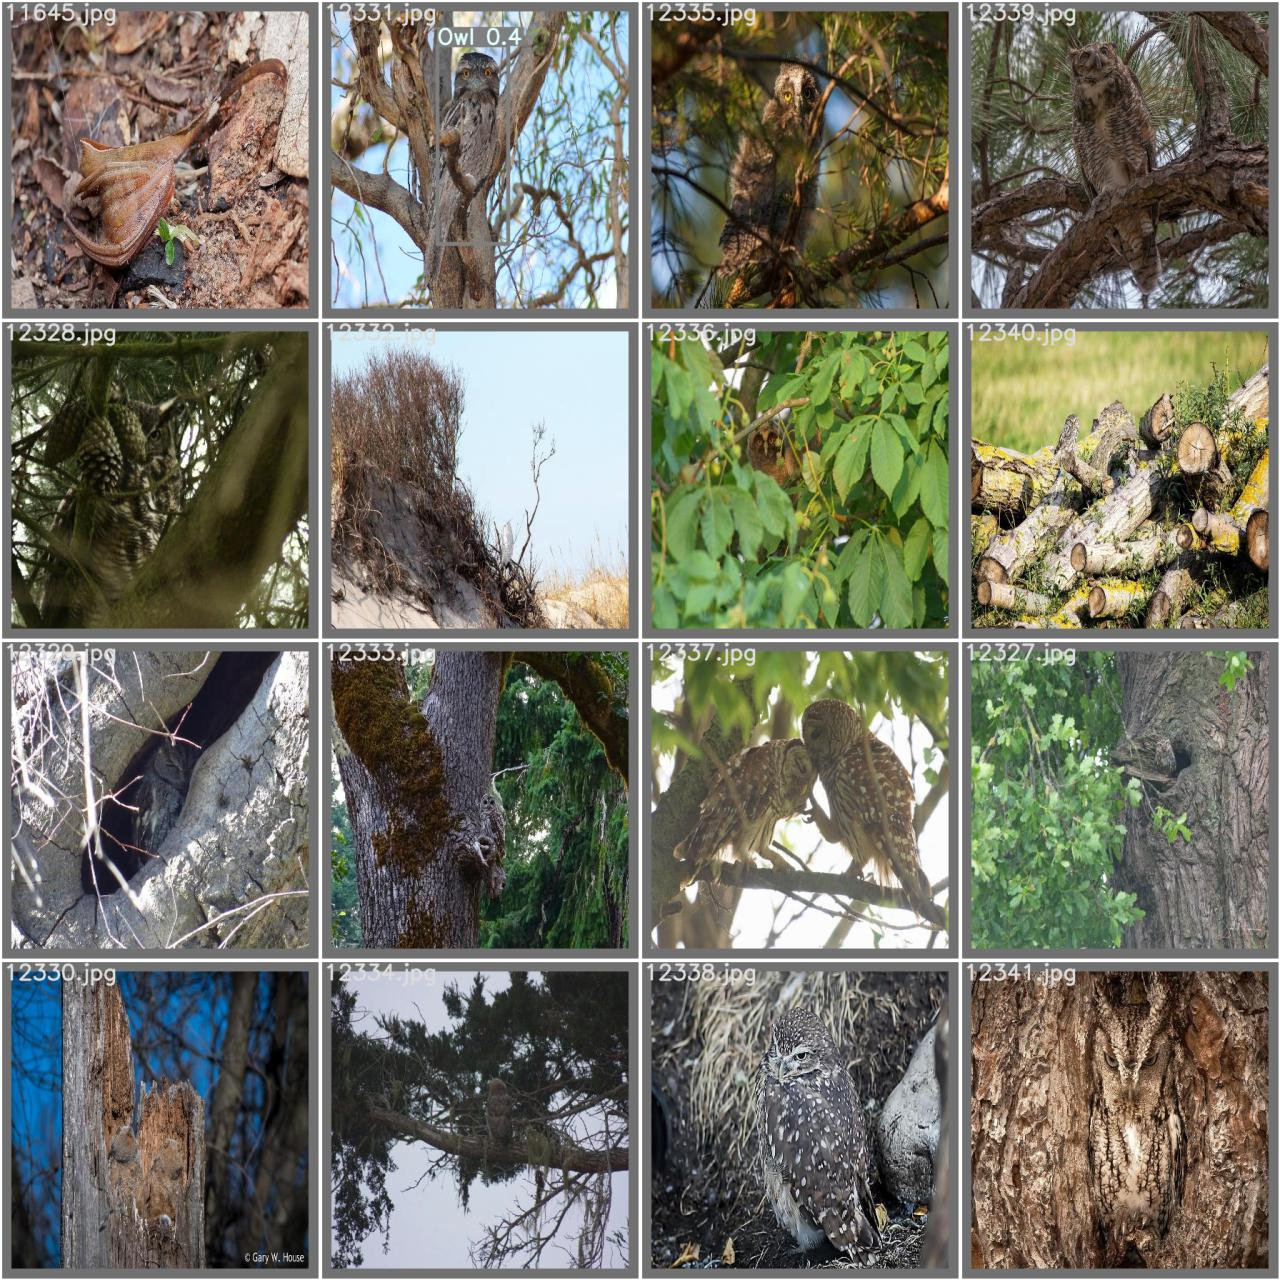

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results/test_batch0_pred.jpg', width=900)

In [ ]:
!zip -r /content/run.zip /content/yolov5/runs

  adding: content/yolov5/runs/ (stored 0%)
  adding: content/yolov5/runs/train/ (stored 0%)
  adding: content/yolov5/runs/train/yolov5s_results/ (stored 0%)
  adding: content/yolov5/runs/train/yolov5s_results/events.out.tfevents.1652894649.2fb8e89cb4e4.173.0 (deflated 68%)
  adding: content/yolov5/runs/train/yolov5s_results/R_curve.png (deflated 14%)
  adding: content/yolov5/runs/train/yolov5s_results/train_batch1.jpg (deflated 1%)
  adding: content/yolov5/runs/train/yolov5s_results/opt.yaml (deflated 49%)
  adding: content/yolov5/runs/train/yolov5s_results/train_batch0.jpg (deflated 1%)
  adding: content/yolov5/runs/train/yolov5s_results/test_batch1_labels.jpg (deflated 5%)
  adding: content/yolov5/runs/train/yolov5s_results/test_batch0_labels.jpg (deflated 5%)
  adding: content/yolov5/runs/train/yolov5s_results/test_batch2_pred.jpg (deflated 6%)
  adding: content/yolov5/runs/train/yolov5s_results/results.png (deflated 7%)
  adding: content/yolov5/runs/train/yolov5s_results/results.tx